# Cleaning/Formatting Website Data

In [17]:
# Import libraries
import pandas as pd
import numpy as np

**The following step may provide inconsistent results, as the data on the website may have changed. Please refer to the CSV file created from the data as it appear when I pulled it.**

In [18]:
# This is the URL to the websit data
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_books'

# I need to read and create lists of the tables from the URL
list_of_df = pd.read_html(url)
# I want the second through fifth table. I will create a DataFrame of each of them
df = list_of_df[1]
df2 = list_of_df[2]
df3 = list_of_df[3]
df4 = list_of_df[4]

# Next, I will concatenate the DataFrames 
book = pd.concat([df, df2, df3, df4], ignore_index=True) # ignore_index will re-index the rows

# I created a CSV file of the final DataFrame to easier access for future work
books = book.to_csv('booksWiki.csv', sep=',', index=False)

In [32]:
books = pd.read_csv('booksWiki.csv')

In [33]:
print('This dataset has {} observations and {} variables.'.format(books.shape[0], books.shape[1]))

This dataset has 160 observations and 6 variables.


In [34]:
# I want to look at the format of the data
books.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85 million[24],Fantasy
1,She: A History of Adventure,H. Rider Haggard,English,1887,83 million[25],Adventure
2,The Adventures of Pinocchio (Le avventure di P...,Carlo Collodi,Italian,1881,>80 million[26][27],Fantasy
3,The Da Vinci Code,Dan Brown,English,2003,80 million[28],Mystery thriller
4,Harry Potter and the Chamber of Secrets,J. K. Rowling,English,1998,77 million[29],Fantasy


In [35]:
# I want to format the variable names by converting them to lowercase and change the names to the following:
books.rename(columns=lambda x: x.lower(), inplace=True)
books.rename(columns={'book': 'title','author(s)': 'authors','approximate sales': 'sales'}, inplace=True)

In [36]:
# I want to format the sales variable by removing unnecessary characters.
books['clean_sales'] = books['sales'].apply(lambda x: x.replace('+',' ').replace('–',' ').replace('million','').\
                                            replace('>','').replace('[',' ').replace('more than ', '').replace(',','.').\
                                            replace('.000.000',' ').replace('0.000','').split(' ')[0])


In [37]:
# Now, I can drop the sales variable and replace it with my formatted data
books.drop(['sales'], axis=1, inplace=True)
books.rename(columns={'clean_sales': 'sales'}, inplace=True)

In [38]:
# Now I want to look for missing data
books.isnull().sum()

title                  0
authors                0
original language      0
first published        0
genre                134
sales                  0
dtype: int64

In [39]:
# Genre has lots of missing data, so I will drop that variable
books.drop(['genre'], axis=1, inplace=True)

In [40]:
print('Describe Data')
print(books.describe())
print('Summarized Data')
print(books.describe(include=['O']))

Describe Data
                  title        authors original language first published sales
count               160            160               160             160   160
unique              160            146                17              90    43
top     The Kite Runner  J. K. Rowling           English            1979    20
freq                  1              6               119               5    28
Summarized Data
                  title        authors original language first published sales
count               160            160               160             160   160
unique              160            146                17              90    43
top     The Kite Runner  J. K. Rowling           English            1979    20
freq                  1              6               119               5    28


In [41]:
books['first published'].unique()

array(['1950', '1887', '1881', '2003', '1998', '1999', '2000', '2005',
       '2007', '1988', '1951', '1992', '1880', '1984', '1967', '1955',
       '1946', '1908', '1877', '1980', '1975', '1972', '1976', '1952',
       '1902', '1970', '1969', '1899', '1960', '1979', '1991', '1932',
       '1869', '1947', '1977', '2002', '1966', '1925', '1936', '1938',
       '1949', '2009', '2008', '1945', '1788', '1934', '1989', '1935',
       '1993', '2012', '2010', '1957', '2015', '1929', '1974', '1958',
       '2004', '1971', '1986', '1885', '1982', '1813', '1923', '1963',
       '2006', '1973', '1965', '1964', '1968', '1981', '1995', '2011',
       '1994', '1942', '1985', '1939', '2001', '1997', '1933', '1962',
       '1987', '1956', '1948', '1304', '2018', '1961', '1978', '1953',
       '1996', '1925-1929'], dtype=object)

In [42]:
# The years are not all strings. The first half are integers. I want to convert them all to integers but I can't
# until the last observation is not a range of years. I will keep the first year listed. 
books['first published'][159] = books['first published'][159].split('-')[0]

In [43]:
# Now, I can convert all years to integers
books['first published'] = books['first published'].astype(int)

In [44]:
books['sales'].unique()

array(['85', '83', '80', '77', '65', '60', '50', '45', '44', '43', '40',
       '39', '37', '36.4', '36.0', '35', '33', '31.5', '31', '30', '29',
       '26', '25', '24', '23', '22', '21', '20', '18', '17', '16', '15.2',
       '15', '14', '13', '12.5', '12', '12.1', '11', '11.5', '10.5',
       '10.4', '10'], dtype=object)

In [45]:
# I also want to convert sales to floats
books['sales'] = books['sales'].astype(float)

In [46]:
# Now I want to look at the other variables to see how many unique values they have
for var in books: # Loops through each variable in the list I just created
    classes = books[var].unique() # For each variable in the list, the unique classes will be returned.
    num = books[var].nunique() # For each variable, the number of the unique classes will be returned.
    print("\n'{}' has {} classes.\n {}".format(var, num, classes))


'title' has 160 classes.
 ['The Lion, the Witch and the Wardrobe' 'She: A History of Adventure'
 'The Adventures of Pinocchio (Le avventure di Pinocchio)'
 'The Da Vinci Code' 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Deathly Hallows' 'The Alchemist (O Alquimista)'
 'The Catcher in the Rye' 'The Bridges of Madison County'
 'Ben-Hur: A Tale of the Christ' 'You Can Heal Your Life'
 'One Hundred Years of Solitude (Cien años de soledad)' 'Lolita' 'Heidi'
 'The Common Sense Book of Baby and Child Care' 'Anne of Green Gables'
 'Black Beauty' 'The Name of the Rose (Il Nome della Rosa)'
 'The Eagle Has Landed' 'Watership Down' 'The Hite Report'
 "Charlotte's Web" 'The Ginger Man' 'The Tale of Peter Rabbit'
 'Jonathan Livingston Seagull' 'The Very Hungry Caterpillar'
 'A Message to Garcia' 'To Kill a Moc

There are no duplicates as all book titles are unique. However, I do want to remove the parts of the title that are enclosed in parentheses and convert to lowercase. 

In [49]:
books['title'] = books['title'].apply(lambda x: x.split(' (')[0])
books['title_lower'] = books['title'].apply(lambda x: x.replace(',', '').lower())

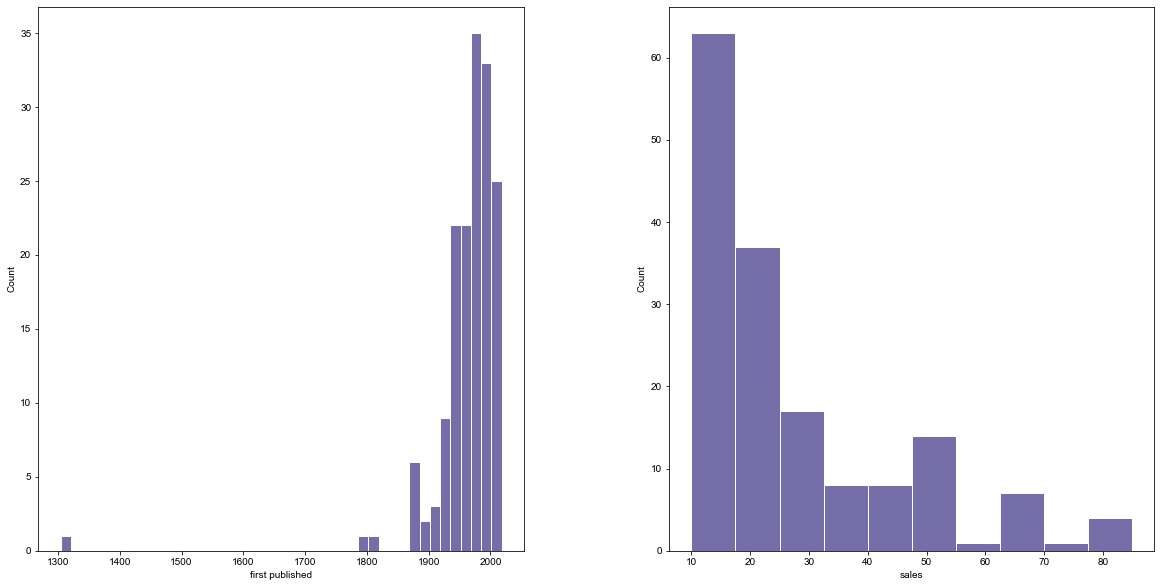

In [50]:
# I want to plot histograms of the numerical data
import matplotlib.pyplot as plt
import seaborn as sns

num_data = ['first published', 'sales']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.subplots_adjust(hspace=0.2, wspace=0.3)
sns.set_style(style='whitegrid')
for var, ax in zip(num_data, axes.flatten()):
    sns.histplot(data=books, x=var, ax=ax, color='darkslateblue')

In [52]:
books[books['first published']<1400]

,title,authors,original language,first published,sales,title_lower
128,The Divine Comedy,Dante Alighieri,Italian,1304,11.0,the divine comedy


The only outlier seemed to be the book first published in 1304. However, I was able to confirm this value is correct through a quick internet search.

In [53]:
# Then, I will save the clean data as a CSV file
book.to_csv('clean_wikibooks.csv', sep=',', index=False)